In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Project Data\\Data\\Ames_Housing_Data.csv')

In [4]:
with open ('C:\\Users\\HP\\OneDrive\\Desktop\\Project Data\\Data\\Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [9]:
df.drop('PID',axis=1,inplace=True)

In [10]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [11]:
def missing_percent(df):
    missing_per = 100*df.isnull().sum()/len(df)
    missing = missing_per[missing_per>0].sort_values()
    sns.barplot(x=missing.index, y=missing)
    plt.xticks(rotation=90);

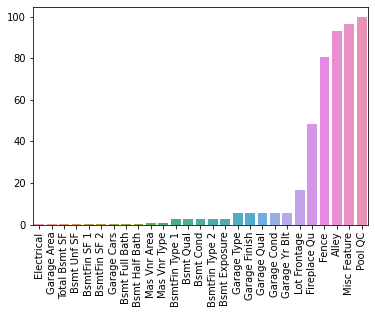

In [12]:
missing_percent(df)

In [13]:
df.drop('Pool QC',axis=1,inplace=True)

In [14]:
df.drop('Misc Feature',axis=1,inplace=True)

In [15]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer = CategoricalImputer(imputation_method='missing', variables=['Alley','Fence'])
categorical_imputer.fit(df)

CategoricalImputer(variables=['Alley', 'Fence'])

In [16]:
df = categorical_imputer.transform(df)

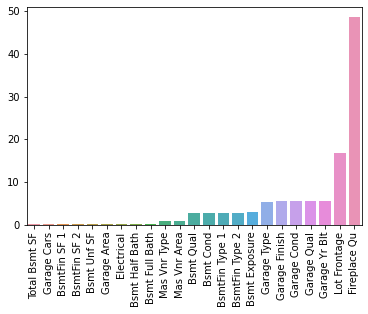

In [17]:
missing_percent(df)

In [19]:
df[df['Fireplaces'] == 0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,0,Missing,12500,6,2010,WD,Normal,172000
6,120,RL,41.0,4920,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,...,0,144,0,Missing,0,1,2010,WD,Normal,191500
11,20,RL,NaN,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,GdPrv,500,3,2010,WD,Normal,185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,90,RL,55.0,12640,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,7,2006,WD,Normal,150900
2922,90,RL,63.0,9297,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,7,2006,WD,Family,188000
2925,80,RL,37.0,7937,Pave,Missing,IR1,Lvl,AllPub,CulDSac,...,0,0,0,GdPrv,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,Missing,IR1,Low,AllPub,Inside,...,0,0,0,MnPrv,0,6,2006,WD,Normal,131000


In [20]:
df[df['Fireplace Qu'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,0,Missing,12500,6,2010,WD,Normal,172000
6,120,RL,41.0,4920,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,...,0,144,0,Missing,0,1,2010,WD,Normal,191500
11,20,RL,NaN,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,GdPrv,500,3,2010,WD,Normal,185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,90,RL,55.0,12640,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,7,2006,WD,Normal,150900
2922,90,RL,63.0,9297,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,7,2006,WD,Family,188000
2925,80,RL,37.0,7937,Pave,Missing,IR1,Lvl,AllPub,CulDSac,...,0,0,0,GdPrv,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,Missing,IR1,Low,AllPub,Inside,...,0,0,0,MnPrv,0,6,2006,WD,Normal,131000


In [21]:
categorical_imputer = CategoricalImputer(imputation_method='missing',fill_value='None',variables=['Fireplace Qu'])
categorical_imputer.fit(df)

CategoricalImputer(fill_value='None', variables=['Fireplace Qu'])

In [22]:
df = categorical_imputer.transform(df)

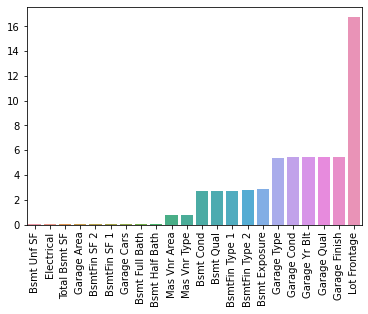

In [23]:
missing_percent(df)

In [25]:
df['Lot Frontage'].isnull().mean()

0.16723549488054607

In [26]:
from feature_engine.imputation import MeanMedianImputer
mean_impute = MeanMedianImputer(imputation_method='mean', variables=['Lot Frontage'])
mean_impute.fit(df)

MeanMedianImputer(imputation_method='mean', variables=['Lot Frontage'])

In [27]:
df = mean_impute.transform(df)

In [29]:
mean_impute.imputer_dict_

{'Lot Frontage': 69.22459016393442}

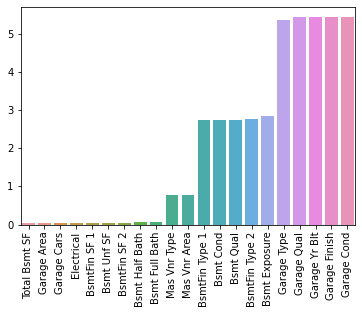

In [30]:
missing_percent(df)

In [32]:
df[df['Garage Area'] == 0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,20,RL,70.0,10500,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0,0,0,Missing,0,4,2010,ConLI,Normal,115000
119,20,RL,77.0,9320,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,400,1,2010,WD,Normal,128950
125,90,RL,98.0,13260,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,1,2010,Oth,Abnorml,84900
129,20,RL,50.0,7207,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,2,2010,WD,Normal,116500
130,30,RL,55.0,5350,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,GdWo,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,180,RM,21.0,1470,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2006,WD,Normal,73000
2916,180,RM,21.0,1533,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,8,2006,WD,Abnorml,92000
2918,160,RM,21.0,1526,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,0,6,2006,WD,Normal,79500
2919,160,RM,21.0,1936,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,6,2006,WD,Normal,90500


In [33]:
df[df['Garage Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,20,RL,70.0,10500,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0,0,0,Missing,0,4,2010,ConLI,Normal,115000
119,20,RL,77.0,9320,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,400,1,2010,WD,Normal,128950
125,90,RL,98.0,13260,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,1,2010,Oth,Abnorml,84900
129,20,RL,50.0,7207,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,2,2010,WD,Normal,116500
130,30,RL,55.0,5350,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,GdWo,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,180,RM,21.0,1470,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2006,WD,Normal,73000
2916,180,RM,21.0,1533,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,8,2006,WD,Abnorml,92000
2918,160,RM,21.0,1526,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,0,6,2006,WD,Normal,79500
2919,160,RM,21.0,1936,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,6,2006,WD,Normal,90500


In [34]:
categorical_imputer = CategoricalImputer(imputation_method='missing',fill_value='None',variables=['Garage Cond','Garage Qual','Garage Finish','Garage Type'])
categorical_imputer.fit(df)

CategoricalImputer(fill_value='None',
                   variables=['Garage Cond', 'Garage Qual', 'Garage Finish',
                              'Garage Type'])

In [35]:
df = categorical_imputer.transform(df)

In [36]:
from feature_engine.imputation import ArbitraryNumberImputer
arbitrary_impute = ArbitraryNumberImputer(arbitrary_number=0,variables=['Garage Yr Blt'])
arbitrary_impute.fit(df)

ArbitraryNumberImputer(arbitrary_number=0, variables=['Garage Yr Blt'])

In [37]:
df = arbitrary_impute.transform(df)

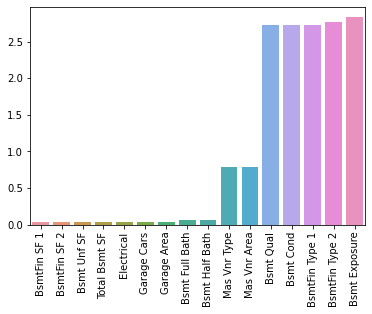

In [38]:
missing_percent(df)

In [40]:
df[df['Bsmt Qual'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
83,90,RM,68.00000,8930,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,112000
154,20,RL,60.00000,7200,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,107500
206,190,RM,70.00000,5600,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,3500,7,2010,WD,Normal,55000
243,20,RL,60.00000,11100,Pave,Missing,Reg,Low,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Abnorml,84900
273,30,RL,67.00000,8777,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,ConLD,Normal,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20,RL,80.00000,12048,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,348,0,Missing,0,4,2006,WD,Normal,135000
2744,20,RL,77.00000,8335,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,4,2006,WD,Normal,93000
2879,30,C (all),69.00000,12366,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,10,2006,WD,Abnorml,51689
2892,120,RM,69.22459,8239,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,11,2006,WD,Normal,230000


In [42]:
df[df['Total Bsmt SF'] == 0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
83,90,RM,68.00000,8930,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,112000
154,20,RL,60.00000,7200,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,107500
206,190,RM,70.00000,5600,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,3500,7,2010,WD,Normal,55000
243,20,RL,60.00000,11100,Pave,Missing,Reg,Low,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Abnorml,84900
273,30,RL,67.00000,8777,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,ConLD,Normal,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20,RL,80.00000,12048,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,348,0,Missing,0,4,2006,WD,Normal,135000
2744,20,RL,77.00000,8335,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,4,2006,WD,Normal,93000
2879,30,C (all),69.00000,12366,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,10,2006,WD,Abnorml,51689
2892,120,RM,69.22459,8239,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,11,2006,WD,Normal,230000


In [43]:
categorical_imputer = CategoricalImputer(imputation_method='missing',fill_value='None',variables=['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure'])

In [44]:
categorical_imputer.fit(df)

CategoricalImputer(fill_value='None',
                   variables=['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1',
                              'BsmtFin Type 2', 'Bsmt Exposure'])

In [45]:
df = categorical_imputer.transform(df)

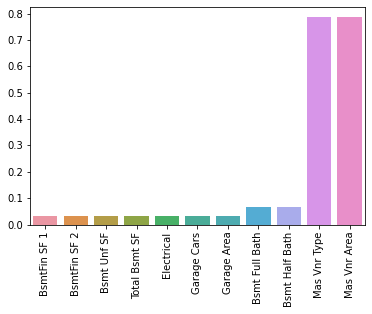

In [46]:
missing_percent(df)

In [50]:
df[df['Mas Vnr Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,69.22459,7851,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,5,2010,WD,Normal,216500
484,60,RL,69.22459,12891,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,0,Missing,0,7,2009,WD,Normal,257500
517,20,FV,90.00000,7993,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,10,2009,New,Partial,225000
538,20,RL,67.00000,10083,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,8,2009,WD,Normal,184900
867,60,RL,70.00000,8749,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,11,2009,WD,Normal,198500
1095,60,RL,69.22459,7750,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2008,WD,Normal,176000
1119,20,RL,87.00000,10037,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,8,2008,WD,Normal,247000
1122,20,FV,95.00000,11639,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,12,2008,New,Partial,182000
1127,60,FV,65.00000,8125,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,5,2008,WD,Normal,205950
1184,60,FV,69.22459,7500,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2008,WD,Normal,205000


In [51]:
df[df['Mas Vnr Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,69.22459,7851,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,5,2010,WD,Normal,216500
484,60,RL,69.22459,12891,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,0,Missing,0,7,2009,WD,Normal,257500
517,20,FV,90.00000,7993,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,10,2009,New,Partial,225000
538,20,RL,67.00000,10083,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,8,2009,WD,Normal,184900
867,60,RL,70.00000,8749,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,11,2009,WD,Normal,198500
1095,60,RL,69.22459,7750,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2008,WD,Normal,176000
1119,20,RL,87.00000,10037,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,8,2008,WD,Normal,247000
1122,20,FV,95.00000,11639,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,12,2008,New,Partial,182000
1127,60,FV,65.00000,8125,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,5,2008,WD,Normal,205950
1184,60,FV,69.22459,7500,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2008,WD,Normal,205000


In [53]:
df[df['Mas Vnr Type']=='None']

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.00000,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
3,20,RL,93.00000,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,...,0,0,0,Missing,0,4,2010,WD,Normal,244000
4,60,RL,74.00000,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,3,2010,WD,Normal,189900
6,120,RL,41.00000,4920,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,4,2010,WD,Normal,213500
7,120,RL,43.00000,5005,Pave,Missing,IR1,HLS,AllPub,Inside,...,0,144,0,Missing,0,1,2010,WD,Normal,191500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,20,RL,160.00000,20000,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,9,2006,WD,Abnorml,131000
2925,80,RL,37.00000,7937,Pave,Missing,IR1,Lvl,AllPub,CulDSac,...,0,0,0,GdPrv,0,3,2006,WD,Normal,142500
2926,20,RL,69.22459,8885,Pave,Missing,IR1,Low,AllPub,Inside,...,0,0,0,MnPrv,0,6,2006,WD,Normal,131000
2927,85,RL,62.00000,10441,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,700,7,2006,WD,Normal,132000


In [55]:
df['Mas Vnr Type'].isnull().mean()

0.007849829351535836

In [56]:
mean_impute = MeanMedianImputer(imputation_method='mean',variables=['Mas Vnr Area'])
mean_impute.fit(df)

MeanMedianImputer(imputation_method='mean', variables=['Mas Vnr Area'])

In [57]:
df = mean_impute.transform(df)

In [59]:
mean_impute.imputer_dict_

{'Mas Vnr Area': 101.8968008255934}

In [60]:
categorical_impute = CategoricalImputer(imputation_method='missing',variables=['Mas Vnr Type'])
categorical_impute.fit(df)

CategoricalImputer(variables=['Mas Vnr Type'])

In [61]:
df = categorical_impute.transform(df)

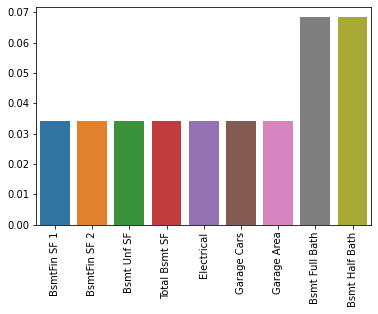

In [63]:
missing_percent(df)

In [65]:
df['Bsmt Full Bath'].isnull().mean()

0.0006825938566552901

In [66]:
df.dropna(subset=['Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

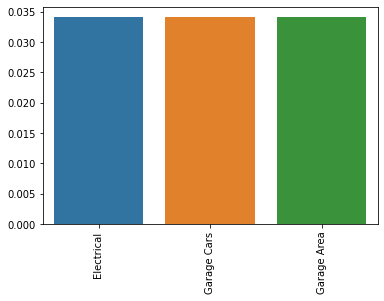

In [67]:
missing_percent(df)

In [68]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909


In [69]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909


In [70]:
df.dropna(subset=['Garage Area'],inplace=True)
df.dropna(subset=['Garage Cars'],inplace=True)

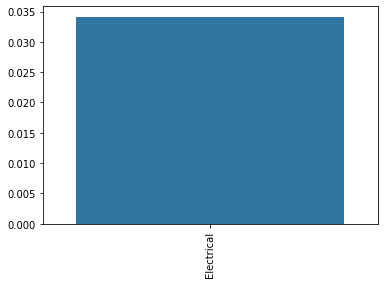

In [71]:
missing_percent(df)

In [74]:
#df.dropna(subset=['Electrical'],inplace=True)

In [77]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'O']

In [79]:
categorical_cols


['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Sale Type',
 'Sale Condition']

In [81]:
from feature_engine.encoding import RareLabelEncoder
rare_encoder = RareLabelEncoder(tol=0.05,n_categories=4)

In [82]:
rare_encoder.fit(df)

C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\encoding\rare_label.py:161: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\encoding\rare_label.py:161: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\encoding\rare_label.py:161: UserWarning: The number of unique categories for variable Lot Shape is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\encoding\rare_label.py:161: UserWarning: The n

RareLabelEncoder(n_categories=4)

In [88]:
df = rare_encoder.transform(df)

In [92]:
categorical_cols

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Sale Type',
 'Sale Condition']

<AxesSubplot:xlabel='Sale Type'>

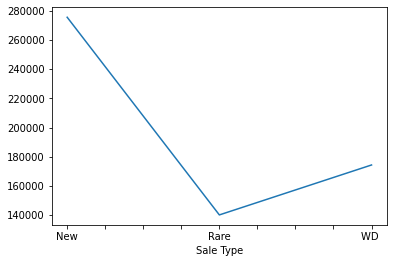

In [93]:
df.groupby(['Sale Type'])['SalePrice'].mean().plot()

<AxesSubplot:xlabel='Sale Condition'>

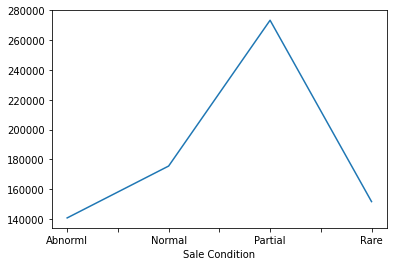

In [94]:
df.groupby(['Sale Condition'])['SalePrice'].mean().plot()

In [95]:
from feature_engine.encoding import OrdinalEncoder
encoder = OrdinalEncoder(encoding_method='arbitrary',variables=categorical_cols)
encoder.fit(df)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['MS Zoning', 'Street', 'Alley', 'Lot Shape',
                          'Land Contour', 'Utilities', 'Lot Config',
                          'Land Slope', 'Neighborhood', 'Condition 1',
                          'Condition 2', 'Bldg Type', 'House Style',
                          'Roof Style', 'Roof Matl', 'Exterior 1st',
                          'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
                          'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
                          'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                          'Heating', 'Heating QC', 'Central Air', 'Electrical', ...])

In [97]:
encoder.encoder_dict_

{'MS Zoning': {'RL': 0, 'Rare': 1, 'RM': 2},
 'Street': {'Pave': 0, 'Grvl': 1},
 'Alley': {'Missing': 0, 'Pave': 1, 'Grvl': 2},
 'Lot Shape': {'IR1': 0, 'Reg': 1, 'IR2': 2, 'IR3': 3},
 'Land Contour': {'Lvl': 0, 'HLS': 1, 'Bnk': 2, 'Low': 3},
 'Utilities': {'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2},
 'Lot Config': {'Corner': 0, 'Inside': 1, 'CulDSac': 2, 'Rare': 3},
 'Land Slope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'NAmes': 0,
  'Gilbert': 1,
  'Rare': 2,
  'Somerst': 3,
  'NridgHt': 4,
  'Sawyer': 5,
  'OldTown': 6,
  'Edwards': 7,
  'CollgCr': 8},
 'Condition 1': {'Norm': 0, 'Feedr': 1, 'Rare': 2},
 'Condition 2': {'Norm': 0, 'Rare': 1},
 'Bldg Type': {'1Fam': 0, 'TwnhsE': 1, 'Rare': 2},
 'House Style': {'1Story': 0, '2Story': 1, '1.5Fin': 2, 'Rare': 3},
 'Roof Style': {'Hip': 0, 'Gable': 1, 'Rare': 2},
 'Roof Matl': {'CompShg': 0, 'Rare': 1},
 'Exterior 1st': {'Rare': 0,
  'VinylSd': 1,
  'Wd Sdng': 2,
  'HdBoard': 3,
  'Plywood': 4,
  'MetalSd': 5},
 'Exterior 2nd': {'P

In [98]:
df = encoder.transform(df)

In [99]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,0,141.0,31770,0,0,0,0,0,0,...,0,0,0,0,0,5,2010,0,0,215000
1,20,1,80.0,11622,0,0,1,0,0,1,...,0,120,0,1,0,6,2010,0,0,105000
2,20,0,81.0,14267,0,0,0,0,0,0,...,0,0,0,0,12500,6,2010,0,0,172000
3,20,0,93.0,11160,0,0,1,0,0,0,...,0,0,0,0,0,4,2010,0,0,244000
4,60,0,74.0,13830,0,0,0,0,0,1,...,0,0,0,1,0,3,2010,0,0,189900


In [102]:
df['has_pool'] = df['Pool Area'].apply(lambda x: 1 if x > 0 else 0)

In [103]:
df['Old'] = 2022 - df['Year Remod/Add']

In [105]:
df.drop('Year Remod/Add',axis=1,inplace=True)

In [111]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [116]:
X_train

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,has_pool,Old
2208,30,0,50.00000,6305,0,0,1,2,0,1,...,0,0,1,0,6,2007,0,0,0,72
996,60,0,69.22459,15038,0,0,2,0,0,0,...,0,0,0,0,11,2008,0,0,0,26
130,30,0,55.00000,5350,0,0,0,0,0,1,...,0,0,2,450,5,2010,0,0,0,56
2202,70,0,53.00000,6720,0,0,1,0,0,1,...,0,0,0,0,4,2007,2,0,0,72
225,90,0,69.22459,7424,0,0,0,0,0,1,...,0,0,0,0,5,2010,0,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,20,0,60.00000,7436,0,0,1,0,0,1,...,0,0,2,0,8,2009,0,0,0,62
1602,20,0,59.00000,6490,0,0,1,0,0,1,...,0,0,2,0,4,2008,0,0,0,39
1362,50,2,69.22459,10320,0,2,1,0,0,1,...,0,0,0,0,4,2008,0,0,0,44
1549,50,2,58.00000,8155,0,0,1,0,0,1,...,0,0,0,0,7,2008,0,0,0,72


In [117]:
from feature_engine.selection import DropConstantFeatures as dc
drop_c = dc()
drop_c.fit(X_train)

DropConstantFeatures()

In [118]:
drop_c.features_to_drop_

[]

In [119]:
X_train = drop_c.transform(X_train)
X_test = drop_c.transform(X_test)

In [122]:
quasi = dc(tol=0.998)
quasi.fit(X_train)

DropConstantFeatures(tol=0.998)

In [124]:
quasi.features_to_drop_

['Utilities']

In [125]:
X_train = quasi.transform(X_train)
X_test = quasi.transform(X_test)

In [127]:
from feature_engine.selection import DropDuplicateFeatures as ddf
duplicated = ddf()
duplicated.fit(X_train)

DropDuplicateFeatures()

In [130]:
duplicated.features_to_drop_

set()

In [131]:
X_train = duplicated.transform(X_train)
X_test = duplicated.transform(X_test)

In [133]:
from feature_engine.selection import DropCorrelatedFeatures as dcf
corelate = dcf()
corelate.fit(X_train)

DropCorrelatedFeatures()

In [135]:
corelate.correlated_feature_sets_

[{'1st Flr SF', 'Total Bsmt SF'},
 {'Gr Liv Area', 'TotRms AbvGrd'},
 {'Garage Area', 'Garage Cars'},
 {'Pool Area', 'has_pool'}]

In [136]:
corelate.features_to_drop_

{'1st Flr SF', 'Garage Area', 'TotRms AbvGrd', 'has_pool'}

In [139]:
from feature_engine.selection import SmartCorrelatedSelection as SCS
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
smart = SCS()

In [143]:
smart.fit(X_train,y_train)

C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:279: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].isnull().sum().sort_values(ascending=True).index[0]
C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:279: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].isnull().sum().sort_values(ascending=True).index[0]
C:\Users\HP\Downloads\Anaconda_new\envs\Housing_env\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:279: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].isnull().sum().sort_values(ascending=True).index[0]
C:\Users\HP\Downloads\Anaconda_new\envs\Hou

SmartCorrelatedSelection()

In [144]:
smart.correlated_feature_sets_

[{'1st Flr SF', 'Total Bsmt SF'},
 {'Gr Liv Area', 'TotRms AbvGrd'},
 {'Garage Area', 'Garage Cars'},
 {'Pool Area', 'has_pool'}]

In [146]:
smart.features_to_drop_

['1st Flr SF', 'Gr Liv Area', 'Garage Area', 'has_pool']

In [147]:
X_train = smart.transform(X_train)
X_test = smart.transform(X_test)

In [149]:
len(X_train.columns)

73

In [157]:
pip install mlXtend

In [158]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [162]:
sel = SFS(RandomForestRegressor(n_estimators=50),k_features=10,forward=True,floating=False,cv=2)

In [163]:
sel.fit(np.array(X_train),y_train)

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestRegressor(n_estimators=50),
                          k_features=10)

In [174]:
var = X_train.columns[list(sel.k_feature_idx_)]

In [168]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestRegressor(n_estimators=50),n_features_to_select = 10)
select.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(n_estimators=50), n_features_to_select=10)

In [173]:
selected_feat = X_train.columns[(select.get_support())]
selected_feat

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'BsmtFin SF 1',
       'Total Bsmt SF', '2nd Flr SF', 'Full Bath', 'TotRms AbvGrd',
       'Garage Cars', 'Old'],
      dtype='object')

In [181]:
var

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Bsmt Qual', 'Total Bsmt SF',
       '2nd Flr SF', 'Bsmt Full Bath', 'Full Bath', 'Fireplaces', 'Old'],
      dtype='object')

In [182]:
variables = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Bsmt Qual', 'Total Bsmt SF',
       '2nd Flr SF', 'Bsmt Full Bath', 'Full Bath', 'Fireplaces', 'Old','Lot Frontage', 'BsmtFin SF 1',
       'Total Bsmt SF', 'TotRms AbvGrd',
       'Garage Cars']

In [183]:
len(variables)

15

In [184]:
variables_to_drop = []

columns = X_train.columns

for i in columns:
    if i not in variables:
        variables_to_drop.append(i)

In [187]:
len(variables_to_drop)

59

In [189]:
variables_to_drop

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Cond',
 'Year Built',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Fence',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Sale Type',
 'Sale Condition']

In [199]:
X_train.drop(labels=variables_to_drop,axis=1,inplace=True)
X_test.drop(labels=variables_to_drop,axis=1,inplace=True)    

In [201]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 2208 to 863
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2048 non-null   int64  
 1   Lot Frontage    2048 non-null   float64
 2   Lot Area        2048 non-null   int64  
 3   Overall Qual    2048 non-null   int64  
 4   Bsmt Qual       2048 non-null   int64  
 5   BsmtFin SF 1    2048 non-null   float64
 6   Total Bsmt SF   2048 non-null   float64
 7   2nd Flr SF      2048 non-null   int64  
 8   Bsmt Full Bath  2048 non-null   float64
 9   Full Bath       2048 non-null   int64  
 10  TotRms AbvGrd   2048 non-null   int64  
 11  Fireplaces      2048 non-null   int64  
 12  Garage Cars     2048 non-null   float64
 13  Old             2048 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 240.0 KB


In [202]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 1828 to 1042
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     878 non-null    int64  
 1   Lot Frontage    878 non-null    float64
 2   Lot Area        878 non-null    int64  
 3   Overall Qual    878 non-null    int64  
 4   Bsmt Qual       878 non-null    int64  
 5   BsmtFin SF 1    878 non-null    float64
 6   Total Bsmt SF   878 non-null    float64
 7   2nd Flr SF      878 non-null    int64  
 8   Bsmt Full Bath  878 non-null    float64
 9   Full Bath       878 non-null    int64  
 10  TotRms AbvGrd   878 non-null    int64  
 11  Fireplaces      878 non-null    int64  
 12  Garage Cars     878 non-null    float64
 13  Old             878 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 102.9 KB


In [205]:
from sklearn.model_selection import train_test_split
X_test,X_validate,y_test,y_validate = train_test_split(X_test,y_test,test_size=0.5,random_state=101)

In [207]:
X_test

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,2nd Flr SF,Bsmt Full Bath,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Old
2831,160,24.00000,2522,7,1,0.0,970.0,739,0.0,2,7,0,2.0,18
389,20,85.00000,11050,7,0,636.0,1176.0,0,0.0,2,5,1,2.0,47
1183,20,103.00000,16280,8,1,1044.0,1426.0,0,1.0,3,6,1,2.0,15
1948,50,60.00000,10284,4,0,1030.0,1151.0,436,1.0,2,6,0,2.0,29
566,160,40.00000,3951,6,1,0.0,612.0,612,0.0,2,4,0,2.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,20,60.00000,6600,5,0,816.0,816.0,0,1.0,1,4,0,2.0,19
2888,90,78.00000,10530,6,1,975.0,975.0,0,1.0,1,4,0,2.0,45
1145,20,69.22459,7153,6,1,1200.0,1278.0,0,1.0,2,6,0,2.0,31
868,60,69.22459,11250,7,1,0.0,944.0,926,0.0,2,6,0,2.0,21


In [208]:
X_validate

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,2nd Flr SF,Bsmt Full Bath,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Old
2123,60,69.22459,9531,6,1,706.0,794.0,914,1.0,2,7,0,2.0,24
141,20,70.00000,10552,5,0,1018.0,1398.0,0,0.0,1,6,1,2.0,63
2735,80,69.22459,19690,6,1,0.0,697.0,626,0.0,2,8,1,2.0,56
2154,20,90.00000,11248,9,1,1059.0,1626.0,0,1.0,2,7,1,3.0,20
480,60,69.22459,8965,7,1,652.0,782.0,683,1.0,2,8,1,2.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,20,91.00000,10437,8,1,1696.0,2109.0,0,1.0,2,7,1,3.0,27
2213,70,86.00000,22420,6,1,1128.0,1370.0,1254,1.0,2,10,1,3.0,72
6,120,41.00000,4920,8,1,616.0,1338.0,0,1.0,2,6,0,2.0,21
323,20,93.00000,10114,5,2,0.0,1430.0,0,0.0,2,7,0,2.0,17


In [210]:
X_train

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,2nd Flr SF,Bsmt Full Bath,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Old
2208,30,50.00000,6305,5,3,0.0,920.0,0,0.0,1,5,1,1.0,72
996,60,69.22459,15038,6,1,138.0,916.0,720,0.0,2,7,1,2.0,26
130,30,55.00000,5350,3,0,0.0,728.0,0,0.0,1,6,0,0.0,56
2202,70,53.00000,6720,6,0,0.0,585.0,585,0.0,1,7,1,1.0,72
225,90,69.22459,7424,5,1,1319.0,1319.0,0,1.0,1,5,2,2.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,20,60.00000,7436,4,0,734.0,894.0,0,1.0,1,5,1,2.0,62
1602,20,59.00000,6490,5,0,534.0,816.0,0,0.0,1,4,0,1.0,39
1362,50,69.22459,10320,5,0,0.0,880.0,428,0.0,2,6,0,2.0,44
1549,50,58.00000,8155,5,1,0.0,780.0,420,0.0,1,7,0,0.0,72


In [211]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [214]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[64,100,128,192],'max_features':[3,4,5,]}

grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=3)

In [216]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': [3, 4, 5],
                         'n_estimators': [64, 100, 128, 192]})

In [218]:
grid_model.best_params_

{'max_features': 5, 'n_estimators': 100}

In [225]:
prediction =grid_model.predict(X_test)
prediction

array([135528.23      , 171326.41      , 261812.51      , 147593.39      ,
       163544.25333333, 148255.        , 143940.        , 103672.07      ,
       226593.51      , 158224.8       , 325243.07      , 205393.72      ,
       138744.75      , 270757.25      , 256397.16      , 118544.83      ,
       176220.58      , 137504.        ,  81099.        , 150858.        ,
       164477.5       , 145898.4       , 269032.41      , 127108.65      ,
       106517.13      , 187210.46666667, 132783.8       , 173620.79      ,
       118328.5       , 147597.75      , 304677.88      , 140763.91      ,
       300800.44      , 361604.93      , 162441.4       , 131105.5       ,
       146511.88      , 211218.58      , 187699.        , 175139.80333333,
       195433.39      , 170207.42      , 190330.65      , 169959.58      ,
       136837.28666667, 194443.7       , 197019.9       , 197236.25      ,
       122186.97      , 239488.24      , 140473.5       , 130473.98      ,
       161710.25      , 3

In [229]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,prediction))


26096.30633148902

In [232]:
df.describe()['SalePrice']

count      2926.000000
mean     180810.098086
std       79893.750054
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [233]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[64,100,128,192],max_features={3,4,5,10,14}}

grid_model = GridSearchCV(estimator=model,param_grid=param_grid)

In [234]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [3, 4, 5, 14, 10],
                         'n_estimators': [64, 100, 128, 192]})

In [236]:
grid_model.best_params_

{'max_features': 3, 'n_estimators': 192}

In [237]:
pred2 = grid_model.predict(X_test)

In [239]:
np.sqrt(mean_squared_error(y_test,pred2))

26009.357513757102

In [241]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[64,100,128,192]}

grid_model = GridSearchCV(estimator=model,param_grid=param_grid)

In [242]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [64, 100, 128, 192]})

In [244]:
grid_model.best_params_

{'n_estimators': 100}

In [246]:
pred3 = grid_model.predict(X_test)

In [247]:
np.sqrt(mean_squared_error(y_test,pred3))

27129.996575285324

In [248]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[64,100,128,192],'max_features':[3,4,5,10,14]}

grid_model = GridSearchCV(estimator=model,param_grid=param_grid)

In [249]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [3, 4, 5, 10, 14],
                         'n_estimators': [64, 100, 128, 192]})

In [251]:
grid_model.best_params_

{'max_features': 3, 'n_estimators': 192}

In [252]:
Final_pred = grid_model.predict(X_validate)

In [253]:
np.sqrt(mean_squared_error(y_validate,Final_pred))

31221.044494336602

In [255]:
variables

['MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 '2nd Flr SF',
 'Bsmt Full Bath',
 'Full Bath',
 'Fireplaces',
 'Old',
 'Lot Frontage',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'TotRms AbvGrd',
 'Garage Cars']

In [256]:
import joblib

In [257]:
joblib.dump(grid_model,'Pred_Model.pkl')

['Pred_Model.pkl']

In [258]:
joblib.dump(variables,'cols_used.pkl')

['cols_used.pkl']

In [260]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,has_pool,Old
0,20,0,141.0,31770,0,0,0,0,0,0,...,0,0,0,5,2010,0,0,215000,0,62
1,20,1,80.0,11622,0,0,1,0,0,1,...,0,1,0,6,2010,0,0,105000,0,61
2,20,0,81.0,14267,0,0,0,0,0,0,...,0,0,12500,6,2010,0,0,172000,0,64
3,20,0,93.0,11160,0,0,1,0,0,0,...,0,0,0,4,2010,0,0,244000,0,54
4,60,0,74.0,13830,0,0,0,0,0,1,...,0,1,0,3,2010,0,0,189900,0,24


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2926 non-null   int64  
 1   MS Zoning        2926 non-null   int64  
 2   Lot Frontage     2926 non-null   float64
 3   Lot Area         2926 non-null   int64  
 4   Street           2926 non-null   int64  
 5   Alley            2926 non-null   int64  
 6   Lot Shape        2926 non-null   int64  
 7   Land Contour     2926 non-null   int64  
 8   Utilities        2926 non-null   int64  
 9   Lot Config       2926 non-null   int64  
 10  Land Slope       2926 non-null   int64  
 11  Neighborhood     2926 non-null   int64  
 12  Condition 1      2926 non-null   int64  
 13  Condition 2      2926 non-null   int64  
 14  Bldg Type        2926 non-null   int64  
 15  House Style      2926 non-null   int64  
 16  Overall Qual     2926 non-null   int64  
 17  Overall Cond  